### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [179]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import random

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [146]:
# Loading the data 
#加载digits手写字体数据集
digits = datasets.load_digits()

In [147]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [148]:

digits.target

array([0, 1, 2, ..., 8, 9, 8])

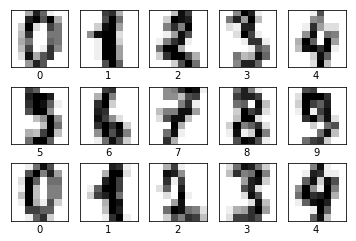

In [149]:
# Vilizating the data
#魔法函数，内嵌绘图，可省略plt.show
%matplotlib inline  
for i in range(1,16):
    plt.subplot(3,5,i) #绘制i子图
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)#灰度图
    plt.text(3,9,str(digits.target[i-1])) #文本注释的位置、内容
    plt.xticks([])#坐标标签为空
    plt.yticks([])#坐标标签为空
#plt.show()

In [150]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [151]:
X_train, X_test, y_train, y_test,X_train.shape,X_test.shape,len(y_train),len(y_test)

(array([[ 0.,  0.,  4., ...,  7.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 16., 16.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  9., ...,  1.,  0.,  0.],
        [ 0.,  0.,  1., ..., 14.,  7.,  0.],
        [ 0.,  0.,  0., ...,  7.,  0.,  0.]]),
 array([[ 0.,  0.,  7., ..., 10., 14.,  0.],
        [ 0.,  3., 16., ...,  0.,  0.,  0.],
        [ 0.,  0.,  2., ...,  1.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  7.,  0.,  0.],
        [ 0.,  0., 11., ..., 14.,  8.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.]]),
 array([6, 1, 4, ..., 9, 6, 4]),
 array([2, 3, 8, 6, 2, 6, 5, 4, 0, 1, 3, 0, 1, 3, 0, 3, 2, 7, 4, 0, 2, 6,
        4, 2, 5, 9, 2, 6, 2, 3, 0, 6, 2, 7, 1, 0, 6, 0, 8, 3, 0, 5, 6, 9,
        0, 5, 1, 3, 3, 5, 5, 3, 0, 3, 4, 1, 1, 5, 3, 0, 7, 9, 8, 5, 9, 1,
        1, 1, 9, 9, 2, 1, 1, 3, 5, 5, 7, 6, 5, 5, 6, 5, 8, 9, 1, 0, 5, 9,
        4, 2, 7, 8, 7, 6, 2, 8, 0, 4, 7, 2, 5, 3, 2, 8, 2, 4, 0, 6, 8, 1,
        1, 8, 1, 0, 2, 2, 6

In [152]:
# reformulate the label. 
# If the digit is smaller than 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1 #数组格式

In [153]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [154]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1/(1 + np.exp(-1 * z))
    
    return s

In [155]:
### Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [216]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initialized scalar
    '''
    
    w = np.random.randn(dim,1) #X.shape=(1347,64),X[i]表示第i个样本,X[i]为（1,64）
    b = random.random()
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)})$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [330]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    m = X.shape[0]
    A = np.array([sigmoid(np.dot(X[i],w) + b) for i in range(m)]).reshape(m,-1)
    cost = (sum([(Y[i]*math.log(A[i][0]+0.0000001) + (1-Y[i])*math.log(1-A[i][0]+0.0000001)) for i in range(m)]))/(-1*m)
                
    
    
    dw =( np.dot((np.array([(A[i][0]-Y[i]) for i in range(m)])),X)/m).reshape(-1,1) #(1,64)
    db = sum([A[i]-Y[i] for i in range(m)])/m
    
    n=0
    for i in range(len(A)):
        if (A[i][0]-y_train[i])**2<0.0001:
            n += 1
    
    training_accuracy = 100*n/len(y_train)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost,training_accuracy

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [335]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    costs_ = []
    n=0
    training_accuracy_ = []
    
    for i in range(num_iterations):
        
        #依据return值，对应赋值
        grads, cost ,training_accuracy= propagate(w,b,X,Y) 
        
        #reshape(1,-1)转化成1行：(2,-1)转换成两行：(-1,1)转换成1列：(-1,2)转化成两列
        dw = grads['dw'].reshape(-1,1) 
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 200 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        costs_ .append(cost)
        
        training_accuracy_.append(training_accuracy)
            
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs,costs_, training_accuracy_

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [336]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[0] #测试样本个数
    Y_prediction = np.zeros((1,m))
    w = w.reshape(1,X.shape[1])
    
    A = np.array([sigmoid(np.dot(w, X[i].reshape(-1,1)) + b) for i in range(m)]).reshape(m,-1)
    
    n=0
    for i in range(A.shape[0]):
        Y_prediction[0][i] = A[i][0] #注意reshape出来的格式
        if (A[i][0]-y_test[i])**2<0.0001:
            n += 1
    test_accuracy =  100*n/len(y_test)
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction,test_accuracy

##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [380]:
def model(X_train, Y_trein, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """

    w,b = initialize_parameters(X_train.shape[1])
    params, grads, costs, costs_,training_accuracy = optimize(w,b,X_train,y_train,num_iterations,learning_rate,print_cost)
    Y_prediction,test_accuracy= predict(params["w"],params["b"],X_test)
    
    d = {}
    d['w'] = w[-1]
    d['b'] = b
    d['training_accuracy'] = training_accuracy[-1]
    d['test_accuracy'] = test_accuracy
    d['cost'] = costs[-1]
    
    #绘制cost函数和训练准确度曲线
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    x = list(range(len(costs_)))
    ax1.plot(x,costs_,'g',label='cost')
    ax1.legend(loc=2)
    ax1.set_ylabel('cost')
    ax2 = ax1.twinx()
    ax2.plot(x,training_accuracy,'r',label='training_accuracy')
    ax2.legend(loc=1)
    ax2.set_ylabel('training_accuracy')
    
   
   
    return d

 - 为方便看结果，d中的w只输出最后一个值w[-1]

Cost after iteration 0: 8.169309
Cost after iteration 200: 6.299869
Cost after iteration 400: 5.293224
Cost after iteration 600: 4.610884
Cost after iteration 800: 4.013931


{'w': array([-0.91671218]),
 'b': 0.96548048097509,
 'training_accuracy': 56.347438752783965,
 'test_accuracy': 56.22222222222222,
 'cost': 3.7435679475031565}

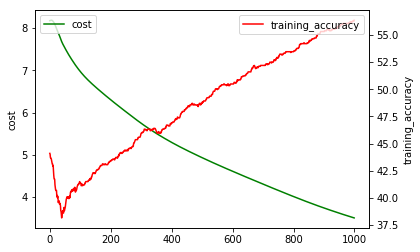

In [392]:
model(X_train, y_train, X_test, y_test, num_iterations=1000, learning_rate=0.001,print_cost=True)

### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

##### 4.2 Observe the effect of iteration_num on the test accuracy.

### 迭代次数相同，学习率0.001-->0.01

Cost after iteration 0: 7.512295
Cost after iteration 200: 1.696959
Cost after iteration 400: 1.103267
Cost after iteration 600: 0.866654
Cost after iteration 800: 0.751653


{'w': array([-0.5759562]),
 'b': 0.8054504003016124,
 'training_accuracy': 70.97253155159613,
 'test_accuracy': 69.55555555555556,
 'cost': 0.7104349849705531}

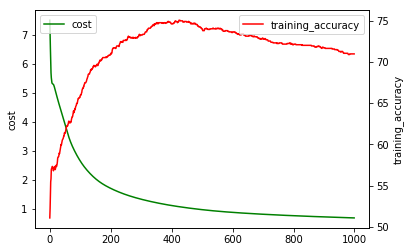

In [389]:
model(X_train, y_train, X_test, y_test, num_iterations=1000, learning_rate=0.01,print_cost=True)

### 学习率0.01，迭代次数1000-->[2000,3000]

Cost after iteration 0: 6.932474
Cost after iteration 200: 1.745787
Cost after iteration 400: 1.149458
Cost after iteration 600: 0.909146
Cost after iteration 800: 0.786070
Cost after iteration 1000: 0.707759
Cost after iteration 1200: 0.648077
Cost after iteration 1400: 0.597066
Cost after iteration 1600: 0.551426
Cost after iteration 1800: 0.509647


{'w': array([-0.2559735]),
 'b': 0.2551234140261702,
 'training_accuracy': 64.81069042316258,
 'test_accuracy': 66.88888888888889,
 'cost': 0.4900312698278512}

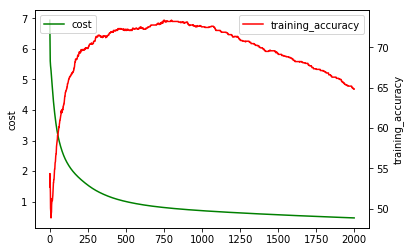

In [384]:
model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.01,print_cost=True)

Cost after iteration 0: 7.434418
Cost after iteration 200: 1.980621
Cost after iteration 400: 1.215101
Cost after iteration 600: 0.886333
Cost after iteration 800: 0.701644
Cost after iteration 1000: 0.593484
Cost after iteration 1200: 0.524897
Cost after iteration 1400: 0.474764
Cost after iteration 1600: 0.433788
Cost after iteration 1800: 0.399537
Cost after iteration 2000: 0.371191
Cost after iteration 2200: 0.348280
Cost after iteration 2400: 0.330244
Cost after iteration 2600: 0.316315
Cost after iteration 2800: 0.305634


{'w': array([0.2783071]),
 'b': 0.31088743226122983,
 'training_accuracy': 41.648106904231625,
 'test_accuracy': 41.333333333333336,
 'cost': 0.3012565094519477}

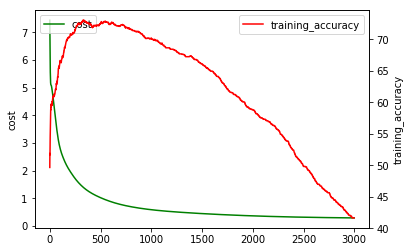

In [385]:
model(X_train, y_train, X_test, y_test, num_iterations=3000, learning_rate=0.01,print_cost=True)

### 学习率0.001，迭代次数1000-->[2000,3000]

Cost after iteration 0: 8.125317
Cost after iteration 200: 6.509191
Cost after iteration 400: 5.483683
Cost after iteration 600: 4.352832
Cost after iteration 800: 3.465550
Cost after iteration 1000: 2.921113
Cost after iteration 1200: 2.562692
Cost after iteration 1400: 2.285532
Cost after iteration 1600: 2.078529
Cost after iteration 1800: 1.926632


{'w': array([-0.06736485]),
 'b': 0.1254276302306664,
 'training_accuracy': 68.0029695619896,
 'test_accuracy': 70.66666666666667,
 'cost': 1.8632024520510142}

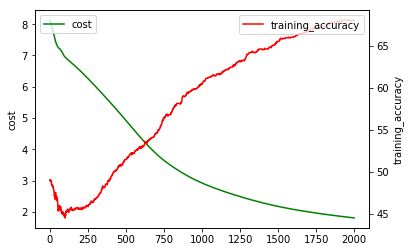

In [386]:
model(X_train, y_train, X_test, y_test, num_iterations=2000, learning_rate=0.001,print_cost=True)

Cost after iteration 0: 6.648505
Cost after iteration 200: 5.582164
Cost after iteration 400: 5.021283
Cost after iteration 600: 4.428238
Cost after iteration 800: 3.841186
Cost after iteration 1000: 3.378706
Cost after iteration 1200: 3.034143
Cost after iteration 1400: 2.747664
Cost after iteration 1600: 2.526202
Cost after iteration 1800: 2.348025
Cost after iteration 2000: 2.202575
Cost after iteration 2200: 2.083131
Cost after iteration 2400: 1.984194
Cost after iteration 2600: 1.898828
Cost after iteration 2800: 1.822932


{'w': array([-1.80329784]),
 'b': 0.2595030665226157,
 'training_accuracy': 67.70601336302896,
 'test_accuracy': 72.0,
 'cost': 1.7879916601728347}

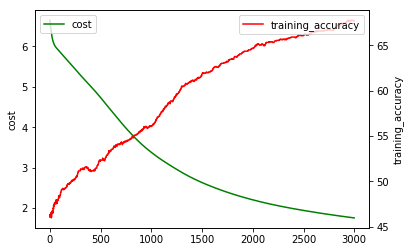

In [387]:
model(X_train, y_train, X_test, y_test, num_iterations=3000, learning_rate=0.001,print_cost=True)

### 学习率0.1，迭代次数1000

Cost after iteration 0: 5.302494
Cost after iteration 200: 1.062468
Cost after iteration 400: 1.193926
Cost after iteration 600: 3.576608
Cost after iteration 800: 3.349887


{'w': array([0.27871485]),
 'b': 0.7278982854260947,
 'training_accuracy': 86.26577579806978,
 'test_accuracy': 88.0,
 'cost': 0.9851859725372423}

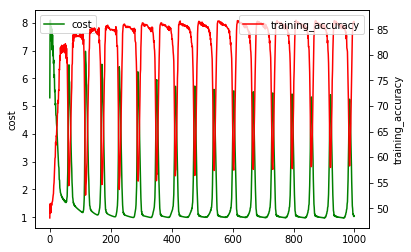

In [388]:
model(X_train, y_train, X_test, y_test, num_iterations=1000, learning_rate=0.1,print_cost=True)

### 超参数变化对结果的影响对比表
（貌似数据无法居中?）

| num_iteration | learning_rate | training_a | test_a | cost |
|:---:|:---:|:---:|:---:|:---:|
|1000|0.1|86.27|88.00|0.99|
|1000|0.01|70.97|69.56|0.71|
|2000|0.01|64.81|66.89|0.49|
|3000|0.01|41.65|41.33|0.30|
|1000|0.001|56.35|56.22|3.74|
|2000|0.001|68.00|70.67|1.86|
|3000|0.001|67.71|72.00|1.79|


### 最后一次试验结论==>
 - 学习率增加，准确率相对降低，收敛速度快
 - 学习率高，随迭代次数增加，准确率降低；学习率低，随迭代次数增加，准确率相对升高
 - 学习率为0.001时，步幅较小，准确率最高所对应的迭代次数在3000以上
 - 学习率为0.01时，步幅较大，准确率最高所对应的迭代次数大致在500左右
 - 学习率为0.1时，步幅大，出现震荡，不收敛